[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/danpele/Time-Series-Analysis/blob/main/chapter1_seminar_notebook.ipynb)

---

# Chapter 1: Seminar - Exercises and Practice

**Course:** Time Series Analysis and Forecasting  
**Program:** Bachelor program, Faculty of Cybernetics, Statistics and Economic Informatics, Bucharest University of Economic Studies, Romania  
**Academic Year:** 2025-2026

---

## Seminar Objectives

In this seminar, you will:
1. Practice calculating exponential smoothing forecasts by hand
2. Apply decomposition methods to real data
3. Test for stationarity using ADF and KPSS tests
4. Evaluate forecast accuracy with different metrics
5. Interpret ACF and PACF plots

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Plotting style - clean, professional
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['axes.facecolor'] = 'none'  # Transparent background
plt.rcParams['figure.facecolor'] = 'none'  # Transparent figure
plt.rcParams['savefig.facecolor'] = 'none'
plt.rcParams['savefig.transparent'] = True
plt.rcParams['legend.frameon'] = False
plt.rcParams['axes.grid'] = False  # No grid
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# Colors
BLUE = '#1A3A6E'
RED = '#DC3545'
GREEN = '#2E7D32'

print("Setup complete!")

Setup complete!


---
# Part 1: Multiple Choice Quiz

Answer the following questions. Run the cell after each answer to check if you're correct.

### Quiz 1: Time Series Basics

**Question:** Which of the following is NOT a characteristic of time series data?

- A) Observations are ordered in time
- B) Consecutive observations are typically correlated
- C) Observations are independent and identically distributed
- D) The data has a natural temporal ordering

In [2]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz1_answer = ''  # <-- Enter your answer here

# Check answer
if quiz1_answer.upper() == 'C':
    print("CORRECT! Time series observations are typically DEPENDENT (autocorrelated), not i.i.d.")
    print("This temporal dependence is what makes time series analysis unique.")
elif quiz1_answer:
    print("Incorrect. Try again!")
    print("Hint: What assumption is violated in time series that holds in cross-sectional data?")

### Quiz 2: Decomposition

**Question:** When should you use multiplicative decomposition instead of additive?

- A) When the seasonal pattern has constant amplitude
- B) When the variance of the series is stable over time
- C) When the seasonal fluctuations grow proportionally with the level
- D) When the time series has no trend component

In [3]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz2_answer = ''  # <-- Enter your answer here

# Check answer
if quiz2_answer.upper() == 'C':
    print("CORRECT! In multiplicative decomposition X = T * S * e,")
    print("the seasonal component S is a ratio, so the absolute effect scales with the level.")
    print("Use when you see 'fan-shaped' patterns where variance increases with mean.")
elif quiz2_answer:
    print("Incorrect. Try again!")
    print("Hint: Think about what happens to seasonal peaks as the series level increases.")

### Quiz 3: Exponential Smoothing

**Question:** In Simple Exponential Smoothing with α = 0.9, what happens?

- A) Forecasts are very smooth and stable
- B) Recent observations have very little weight
- C) Forecasts react quickly to recent changes
- D) The forecast is essentially a long-term average

In [4]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz3_answer = ''  # <-- Enter your answer here

# Check answer
if quiz3_answer.upper() == 'C':
    print("CORRECT! With α = 0.9: forecast = 0.9 * X_t + 0.1 * previous_forecast")
    print("This means 90% weight on the most recent observation!")
    print("High α = reactive. Low α = smooth.")
elif quiz3_answer:
    print("Incorrect. Try again!")
    print("Hint: What does a high α mean for the weight on the most recent observation?")

### Quiz 4: Stationarity

**Question:** A random walk process $X_t = X_{t-1} + \varepsilon_t$ is:

- A) Strictly stationary
- B) Weakly stationary
- C) Non-stationary because variance grows with time
- D) Stationary after adding a constant

In [5]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz4_answer = ''  # <-- Enter your answer here

# Check answer
if quiz4_answer.upper() == 'C':
    print("CORRECT! For random walk: Var(X_t) = t * σ²")
    print("The variance grows with time, violating stationarity.")
    print("Solution: DIFFERENCING gives ΔX_t = ε_t which IS stationary.")
elif quiz4_answer:
    print("Incorrect. Try again!")
    print("Hint: What is Var(X_t) for a random walk? Does it depend on t?")

### Quiz 5: Unit Root Tests

**Question:** You run ADF and KPSS tests. ADF fails to reject H₀, and KPSS rejects H₀. What do you conclude?

- A) The series is stationary
- B) The series has a unit root (non-stationary)
- C) The results are inconclusive
- D) You need to run more tests

In [6]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz5_answer = ''  # <-- Enter your answer here

# Check answer
if quiz5_answer.upper() == 'B':
    print("CORRECT!")
    print("ADF: H₀ = unit root. Fail to reject → evidence FOR unit root")
    print("KPSS: H₀ = stationary. Reject → evidence AGAINST stationarity")
    print("Both agree: the series is NON-STATIONARY. You should difference it.")
elif quiz5_answer:
    print("Incorrect. Try again!")
    print("Hint: Remember the null hypotheses are OPPOSITE for ADF and KPSS.")

### Quiz 6: ACF Interpretation

**Question:** The ACF of a time series shows significant spikes at lags 1, 2, and 3, then cuts off. This pattern suggests:

- A) An AR process
- B) An MA process
- C) White noise
- D) A random walk

In [7]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz6_answer = ''  # <-- Enter your answer here

# Check answer
if quiz6_answer.upper() == 'B':
    print("CORRECT! ACF cuts off → MA process.")
    print("For MA(q), ACF is zero after lag q.")
    print("AR processes have ACF that decays (exponentially or oscillating).")
elif quiz6_answer:
    print("Incorrect. Try again!")
    print("Hint: Which process has ACF that cuts off vs decays?")

### Quiz 7: PACF Interpretation

**Question:** The PACF of a time series shows a significant spike at lag 1 only, then cuts off. This suggests:

- A) MA(1) process
- B) AR(1) process
- C) ARMA(1,1) process
- D) White noise

In [8]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz7_answer = ''  # <-- Enter your answer here

# Check answer
if quiz7_answer.upper() == 'B':
    print("CORRECT! PACF cuts off → AR process.")
    print("For AR(p), PACF is zero after lag p.")
    print("MA processes have PACF that decays.")
elif quiz7_answer:
    print("Incorrect. Try again!")
    print("Hint: PACF cut-off suggests AR, ACF cut-off suggests MA.")

### Quiz 8: White Noise

**Question:** Which of the following is true about white noise?

- A) It must be normally distributed
- B) It has zero mean, constant variance, and no autocorrelation
- C) Its ACF shows exponential decay
- D) It always has unit variance

In [9]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz8_answer = ''  # <-- Enter your answer here

# Check answer
if quiz8_answer.upper() == 'B':
    print("CORRECT! White noise has zero mean, constant variance, and no autocorrelation.")
    print("It doesn't need to be normally distributed - that's Gaussian white noise.")
    print("The variance can be any positive constant, not necessarily 1.")
elif quiz8_answer:
    print("Incorrect. Try again!")
    print("Hint: What are the three defining properties of white noise?")

### Quiz 9: Trend vs Stationarity

**Question:** A time series has a clear upward linear trend. What is the best approach before modeling?

- A) Apply log transformation
- B) Apply first differencing
- C) Use multiplicative decomposition
- D) Increase the sample size

In [10]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz9_answer = ''  # <-- Enter your answer here

# Check answer
if quiz9_answer.upper() == 'B':
    print("CORRECT! First differencing removes a linear trend.")
    print("If Y_t = a + bt + e_t, then delta Y_t = Y_t - Y_{t-1} = b + delta e_t")
    print("The differenced series has constant mean (b) and is stationary.")
elif quiz9_answer:
    print("Incorrect. Try again!")
    print("Hint: What transformation removes a linear trend from the data?")

### Quiz 10: Forecast Accuracy Metrics (RMSE vs MAE)

**Question:** When comparing RMSE and MAE for forecast evaluation, which statement is correct?

- A) RMSE is always smaller than MAE
- B) RMSE penalizes large errors more heavily than MAE
- C) MAE is more sensitive to outliers than RMSE
- D) RMSE and MAE always give the same ranking of models

In [11]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz10_answer = ''  # <-- Enter your answer here

# Check answer
if quiz10_answer.upper() == 'B':
    print("CORRECT! RMSE squares the errors before averaging, so large errors are penalized more.")
    print("RMSE >= MAE always (equality only when all errors are equal).")
    print("Use RMSE when large errors are particularly undesirable.")
elif quiz10_answer:
    print("Incorrect. Try again!")
    print("Hint: What happens when you square a large error vs a small error?")

### Quiz 11: Lag Operator

**Question:** If $L$ is the lag operator such that $LX_t = X_{t-1}$, what is $(1-L)X_t$?

- A) $X_t + X_{t-1}$
- B) $X_t - X_{t-1}$
- C) $X_{t-1} - X_t$
- D) $X_t \cdot X_{t-1}$

In [12]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz11_answer = ''  # <-- Enter your answer here

# Check answer
if quiz11_answer.upper() == 'B':
    print("CORRECT! (1-L)X_t = X_t - LX_t = X_t - X_{t-1}")
    print("This is the first difference! The lag operator L shifts the series back one period.")
    print("(1-L) is called the difference operator, often written as delta.")
elif quiz11_answer:
    print("Incorrect. Try again!")
    print("Hint: Apply the operator: (1-L)X_t = 1*X_t - L*X_t")

### Quiz 12: Mean Reversion

**Question:** A stationary time series exhibits mean reversion. This means:

- A) The series always increases over time
- B) The series tends to return to its long-run average after deviations
- C) The mean changes over time
- D) The series has no variance

In [13]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz12_answer = ''  # <-- Enter your answer here

# Check answer
if quiz12_answer.upper() == 'B':
    print("CORRECT! Mean reversion is a key property of stationary processes.")
    print("After a shock, the series tends to return to its long-run mean.")
    print("Non-stationary series (like random walks) do NOT mean-revert.")
elif quiz12_answer:
    print("Incorrect. Try again!")
    print("Hint: What happens to a stationary series after it deviates from its average?")

### Quiz 13: Holt-Winters Parameters

**Question:** In Holt-Winters exponential smoothing, what does the gamma (γ) parameter control?

- A) The level smoothing
- B) The trend smoothing
- C) The seasonal smoothing
- D) The error variance

In [14]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz13_answer = ''  # <-- Enter your answer here

# Check answer
if quiz13_answer.upper() == 'C':
    print("CORRECT! In Holt-Winters: alpha controls level, beta controls trend, gamma controls seasonality.")
    print("A high gamma means the seasonal pattern adapts quickly to recent seasonal changes.")
    print("A low gamma means the seasonal pattern is more stable over time.")
elif quiz13_answer:
    print("Incorrect. Try again!")
    print("Hint: Holt-Winters has three parameters: alpha (level), beta (trend), and gamma (?)")

### Quiz 14: Cross-validation for Time Series

**Question:** Why can't we use standard k-fold cross-validation for time series data?

- A) Time series data is too large
- B) It violates the temporal ordering and causes data leakage
- C) Cross-validation only works for classification
- D) Time series data has no variance

In [15]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz14_answer = ''  # <-- Enter your answer here

# Check answer
if quiz14_answer.upper() == 'B':
    print("CORRECT! Standard k-fold CV randomly shuffles data, which destroys temporal ordering.")
    print("Using future data to predict the past causes data leakage and overly optimistic results.")
    print("Use time series CV: expanding window or rolling window validation instead.")
elif quiz14_answer:
    print("Incorrect. Try again!")
    print("Hint: What happens when you shuffle time series data and use future values to predict past?")

### Quiz 15: Variance Stabilization

**Question:** A time series shows increasing variance as the level increases (heteroscedasticity). Which transformation is most appropriate?

- A) First differencing
- B) Log transformation
- C) Adding a constant
- D) Seasonal differencing

In [16]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz15_answer = ''  # <-- Enter your answer here

# Check answer
if quiz15_answer.upper() == 'B':
    print("CORRECT! Log transformation stabilizes variance when it increases with the level.")
    print("If Var(X) is proportional to E[X]^2, then Var(log X) becomes approximately constant.")
    print("This is common in financial and economic data.")
elif quiz15_answer:
    print("Incorrect. Try again!")
    print("Hint: Which transformation converts multiplicative relationships to additive?")

### Quiz 16: Autocorrelation Properties

**Question:** For a stationary process, the autocorrelation function $\rho(h)$ must satisfy:

- A) $\rho(h) = h$ for all lags
- B) $\rho(0) = 1$ and $|\rho(h)| \leq 1$ for all h
- C) $\rho(h) > 0$ for all lags
- D) $\rho(h)$ must be monotonically decreasing

In [17]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz16_answer = ''  # <-- Enter your answer here

# Check answer
if quiz16_answer.upper() == 'B':
    print("CORRECT! The ACF at lag 0 is always 1 (a variable is perfectly correlated with itself).")
    print("Correlations are bounded between -1 and 1 by definition.")
    print("ACF can be negative (e.g., AR(1) with negative phi) and need not be monotonic.")
elif quiz16_answer:
    print("Incorrect. Try again!")
    print("Hint: What is the correlation of a variable with itself? Can correlations exceed 1?")

### Quiz 17: Trend Estimation

**Question:** Which method is most appropriate for estimating a non-linear trend in a time series?

- A) Simple moving average with window size 3
- B) Linear regression on time
- C) LOESS (locally weighted regression)
- D) First differencing

In [18]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz17_answer = ''  # <-- Enter your answer here

# Check answer
if quiz17_answer.upper() == 'C':
    print("CORRECT! LOESS (Locally Estimated Scatterplot Smoothing) is ideal for non-linear trends.")
    print("It fits local polynomials to subsets of data, adapting to changing curvature.")
    print("Linear regression assumes a straight line; differencing removes trends but doesn't estimate them.")
elif quiz17_answer:
    print("Incorrect. Try again!")
    print("Hint: Which method can adapt to curves and changes in trend direction?")

### Quiz 18: Seasonal Adjustment

**Question:** What is the purpose of seasonal adjustment in time series analysis?

- A) To remove the trend component
- B) To make the series non-stationary
- C) To remove recurring seasonal patterns for better trend analysis
- D) To increase the variance of the series

In [19]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz18_answer = ''  # <-- Enter your answer here

# Check answer
if quiz18_answer.upper() == 'C':
    print("CORRECT! Seasonal adjustment removes predictable seasonal patterns from data.")
    print("This makes it easier to see the underlying trend and irregular movements.")
    print("Seasonally adjusted data is often published for economic indicators like GDP and unemployment.")
elif quiz18_answer:
    print("Incorrect. Try again!")
    print("Hint: Why would economists want to 'remove' the Christmas shopping spike from retail sales?")

### Quiz 19: Forecast Horizon

**Question:** As the forecast horizon increases, what typically happens to forecast accuracy?

- A) Accuracy improves because more data is used
- B) Accuracy decreases because uncertainty accumulates
- C) Accuracy stays constant for stationary series
- D) Accuracy improves due to mean reversion

In [20]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz19_answer = ''  # <-- Enter your answer here

# Check answer
if quiz19_answer.upper() == 'B':
    print("CORRECT! Forecast uncertainty grows with the horizon.")
    print("Each step ahead compounds the error from previous forecasts.")
    print("This is why confidence intervals 'fan out' as h increases.")
elif quiz19_answer:
    print("Incorrect. Try again!")
    print("Hint: What happens to prediction intervals as you forecast further ahead?")

### Quiz 20: Model Parsimony

**Question:** In time series modeling, why is parsimony (using simpler models) often preferred?

- A) Simpler models always have lower AIC
- B) Simpler models are faster to estimate
- C) Simpler models generalize better and avoid overfitting
- D) Simpler models have higher R-squared values

In [21]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz20_answer = ''  # <-- Enter your answer here

# Check answer
if quiz20_answer.upper() == 'C':
    print("CORRECT! The principle of parsimony says: prefer simpler models when they fit equally well.")
    print("Complex models may fit training data better but often perform worse on new data (overfitting).")
    print("Information criteria (AIC, BIC) penalize complexity to balance fit and parsimony.")
elif quiz20_answer:
    print("Incorrect. Try again!")
    print("Hint: What is the risk of using a model with too many parameters?")

---
# Part 2: True/False Questions

In [22]:
# Answer each statement with True or False
tf_answers = {
    1: None,  # "The ACF of a stationary AR(1) process decays exponentially."
    2: None,  # "White noise is always normally distributed."
    3: None,  # "Differencing can make a non-stationary series stationary."
    4: None,  # "The PACF of a MA(1) process cuts off after lag 1."
    5: None,  # "You should always use the test set for hyperparameter tuning."
    6: None,  # "Holt-Winters is appropriate for data with no seasonality."
}

# Enter your answers below (True or False)
tf_answers[1] = None  # ACF of AR(1) decays exponentially
tf_answers[2] = None  # White noise is always normal
tf_answers[3] = None  # Differencing makes series stationary
tf_answers[4] = None  # PACF of MA(1) cuts off at lag 1
tf_answers[5] = None  # Use test set for tuning
tf_answers[6] = None  # Holt-Winters for non-seasonal data

In [23]:
# Check your answers
correct_answers = {1: True, 2: False, 3: True, 4: False, 5: False, 6: False}
explanations = {
    1: "TRUE: For AR(1), ρ(h) = φ^h, which decays exponentially.",
    2: "FALSE: White noise only requires zero mean, constant variance, no autocorrelation. Gaussian WN is a special case.",
    3: "TRUE: Differencing removes stochastic trends (unit roots).",
    4: "FALSE: It's the ACF that cuts off for MA. PACF DECAYS for MA processes.",
    5: "FALSE: Use VALIDATION set for tuning. Test set is for FINAL evaluation only!",
    6: "FALSE: Use Holt's method (no seasonal) or SES for non-seasonal data."
}

score = 0
for q, correct in correct_answers.items():
    user_ans = tf_answers[q]
    if user_ans is None:
        status = "NOT ANSWERED"
    elif user_ans == correct:
        status = "CORRECT"
        score += 1
    else:
        status = "INCORRECT"
    print(f"Q{q}: {status}")
    if user_ans is not None:
        print(f"   {explanations[q]}")
    print()

print(f"\nScore: {score}/6")

Q1: NOT ANSWERED

Q2: NOT ANSWERED

Q3: NOT ANSWERED

Q4: NOT ANSWERED

Q5: NOT ANSWERED

Q6: NOT ANSWERED


Score: 0/6


---
# Part 3: Calculation Exercises

## Exercise 1: Simple Exponential Smoothing by Hand

Given the following data and α = 0.3:

| t | 1 | 2 | 3 | 4 | 5 |
|---|---|---|---|---|---|
| X_t | 10 | 12 | 11 | 14 | 13 |

Starting with $\hat{X}_1 = X_1 = 10$, calculate the forecasts.

In [24]:
# Data
X = [10, 12, 11, 14, 13]
alpha = 0.3

# YOUR TASK: Fill in the forecasts
# Formula: X_hat[t+1] = alpha * X[t] + (1-alpha) * X_hat[t]

X_hat = [10]  # Start with X_hat[1] = 10

# Calculate X_hat[2]
X_hat_2 = None  # <-- Calculate this

# Calculate X_hat[3]
X_hat_3 = None  # <-- Calculate this

# Calculate X_hat[4]
X_hat_4 = None  # <-- Calculate this

# Calculate X_hat[5]
X_hat_5 = None  # <-- Calculate this

# Calculate X_hat[6] (forecast for next period)
X_hat_6 = None  # <-- Calculate this

print("Your answers:")
print(f"X_hat[2] = {X_hat_2}")
print(f"X_hat[3] = {X_hat_3}")
print(f"X_hat[4] = {X_hat_4}")
print(f"X_hat[5] = {X_hat_5}")
print(f"X_hat[6] = {X_hat_6}")

Your answers:
X_hat[2] = None
X_hat[3] = None
X_hat[4] = None
X_hat[5] = None
X_hat[6] = None


In [25]:
# SOLUTION - Run this to check your answers
print("SOLUTION:")
print("="*50)

X = [10, 12, 11, 14, 13]
alpha = 0.3
X_hat_sol = [10]  # X_hat[1] = X[1] = 10

for t in range(len(X)):
    next_forecast = alpha * X[t] + (1 - alpha) * X_hat_sol[-1]
    X_hat_sol.append(round(next_forecast, 2))
    if t < len(X) - 1:
        print(f"X_hat[{t+2}] = {alpha} × {X[t]} + {1-alpha} × {X_hat_sol[t]:.2f} = {next_forecast:.2f}")
    else:
        print(f"X_hat[{t+2}] = {alpha} × {X[t]} + {1-alpha} × {X_hat_sol[t]:.2f} = {next_forecast:.2f} (Forecast)")

# Calculate errors
errors = [X[i] - X_hat_sol[i] for i in range(1, len(X))]
mae = np.mean(np.abs(errors))
rmse = np.sqrt(np.mean(np.array(errors)**2))

print(f"\nErrors: {[round(e, 2) for e in errors]}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

SOLUTION:
X_hat[2] = 0.3 × 10 + 0.7 × 10.00 = 10.00
X_hat[3] = 0.3 × 12 + 0.7 × 10.00 = 10.60
X_hat[4] = 0.3 × 11 + 0.7 × 10.60 = 10.72
X_hat[5] = 0.3 × 14 + 0.7 × 10.72 = 11.70
X_hat[6] = 0.3 × 13 + 0.7 × 11.70 = 12.09 (Forecast)

Errors: [2.0, 0.4, 3.28, 1.3]
MAE: 1.745
RMSE: 2.038


## Exercise 2: Autocovariance Calculations

For a stationary process with:
- E[X_t] = 5
- γ(0) = 4 (variance)
- γ(1) = 2
- γ(2) = 1

Calculate:
1. The autocorrelation function ρ(0), ρ(1), ρ(2)
2. Cov(X_t, X_{t-1})
3. Corr(X_5, X_7)

In [26]:
# Given values
mu = 5
gamma_0 = 4  # Var(X_t)
gamma_1 = 2
gamma_2 = 1

# YOUR TASK: Calculate the following
# Formula: ρ(h) = γ(h) / γ(0)

rho_0 = None  # <-- Calculate ρ(0)
rho_1 = None  # <-- Calculate ρ(1)
rho_2 = None  # <-- Calculate ρ(2)

cov_Xt_Xt_minus_1 = None  # <-- Cov(X_t, X_{t-1})
corr_X5_X7 = None  # <-- Corr(X_5, X_7)

print("Your answers:")
print(f"ρ(0) = {rho_0}")
print(f"ρ(1) = {rho_1}")
print(f"ρ(2) = {rho_2}")
print(f"Cov(X_t, X_{{t-1}}) = {cov_Xt_Xt_minus_1}")
print(f"Corr(X_5, X_7) = {corr_X5_X7}")

Your answers:
ρ(0) = None
ρ(1) = None
ρ(2) = None
Cov(X_t, X_{t-1}) = None
Corr(X_5, X_7) = None


In [27]:
# SOLUTION
print("SOLUTION:")
print("="*50)

rho_0_sol = gamma_0 / gamma_0
rho_1_sol = gamma_1 / gamma_0
rho_2_sol = gamma_2 / gamma_0

print(f"ρ(0) = γ(0)/γ(0) = {gamma_0}/{gamma_0} = {rho_0_sol}")
print(f"ρ(1) = γ(1)/γ(0) = {gamma_1}/{gamma_0} = {rho_1_sol}")
print(f"ρ(2) = γ(2)/γ(0) = {gamma_2}/{gamma_0} = {rho_2_sol}")

print(f"\nCov(X_t, X_{{t-1}}) = γ(1) = {gamma_1}")
print(f"   (By stationarity, lag 1 covariance is always γ(1))")

print(f"\nCorr(X_5, X_7) = ρ(|7-5|) = ρ(2) = {rho_2_sol}")
print(f"   (Correlation depends only on the LAG, not the specific times)")

SOLUTION:
ρ(0) = γ(0)/γ(0) = 4/4 = 1.0
ρ(1) = γ(1)/γ(0) = 2/4 = 0.5
ρ(2) = γ(2)/γ(0) = 1/4 = 0.25

Cov(X_t, X_{t-1}) = γ(1) = 2
   (By stationarity, lag 1 covariance is always γ(1))

Corr(X_5, X_7) = ρ(|7-5|) = ρ(2) = 0.25
   (Correlation depends only on the LAG, not the specific times)


## Exercise 3: Random Walk Properties

Consider a random walk $X_t = X_{t-1} + \varepsilon_t$ where $\varepsilon_t \sim WN(0, 4)$ and $X_0 = 100$.

Calculate:
1. E[X_10]
2. Var(X_10)
3. Cov(X_5, X_10)
4. 95% confidence interval for X_100

In [28]:
# Given
X_0 = 100
sigma_sq = 4  # Var(epsilon_t)

# YOUR TASK: Calculate the following
# Formulas for random walk:
# E[X_t] = X_0
# Var(X_t) = t * sigma^2
# Cov(X_s, X_t) = min(s, t) * sigma^2

E_X10 = None  # <-- Calculate E[X_10]
Var_X10 = None  # <-- Calculate Var(X_10)
Cov_X5_X10 = None  # <-- Calculate Cov(X_5, X_10)

# For 95% CI of X_100:
E_X100 = None  # <-- E[X_100]
SD_X100 = None  # <-- Standard deviation of X_100
CI_lower = None  # <-- Lower bound (use 1.96)
CI_upper = None  # <-- Upper bound

print("Your answers:")
print(f"E[X_10] = {E_X10}")
print(f"Var(X_10) = {Var_X10}")
print(f"Cov(X_5, X_10) = {Cov_X5_X10}")
print(f"95% CI for X_100: [{CI_lower}, {CI_upper}]")

Your answers:
E[X_10] = None
Var(X_10) = None
Cov(X_5, X_10) = None
95% CI for X_100: [None, None]


In [29]:
# SOLUTION
print("SOLUTION:")
print("="*50)

E_X10_sol = X_0
Var_X10_sol = 10 * sigma_sq
Cov_X5_X10_sol = min(5, 10) * sigma_sq

print(f"E[X_10] = X_0 = {E_X10_sol}")
print(f"   (Mean stays at starting value for random walk)")

print(f"\nVar(X_10) = 10 × σ² = 10 × {sigma_sq} = {Var_X10_sol}")

print(f"\nCov(X_5, X_10) = min(5, 10) × σ² = 5 × {sigma_sq} = {Cov_X5_X10_sol}")

E_X100_sol = X_0
Var_X100_sol = 100 * sigma_sq
SD_X100_sol = np.sqrt(Var_X100_sol)
CI_lower_sol = E_X100_sol - 1.96 * SD_X100_sol
CI_upper_sol = E_X100_sol + 1.96 * SD_X100_sol

print(f"\n95% CI for X_100:")
print(f"   E[X_100] = {E_X100_sol}")
print(f"   Var(X_100) = 100 × {sigma_sq} = {Var_X100_sol}")
print(f"   SD(X_100) = √{Var_X100_sol} = {SD_X100_sol}")
print(f"   CI = {E_X100_sol} ± 1.96 × {SD_X100_sol}")
print(f"   CI = [{CI_lower_sol:.1f}, {CI_upper_sol:.1f}]")

SOLUTION:
E[X_10] = X_0 = 100
   (Mean stays at starting value for random walk)

Var(X_10) = 10 × σ² = 10 × 4 = 40

Cov(X_5, X_10) = min(5, 10) × σ² = 5 × 4 = 20

95% CI for X_100:
   E[X_100] = 100
   Var(X_100) = 100 × 4 = 400
   SD(X_100) = √400 = 20.0
   CI = 100 ± 1.96 × 20.0
   CI = [60.8, 139.2]


---
# Part 4: Python Coding Exercises

## Exercise 4: Load and Analyze Real Data

In [30]:
# TASK: Download Apple stock data and perform basic analysis

# Step 1: Download data using yfinance
# YOUR CODE HERE
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2025-01-01'

# Download the data
# data = yf.download(...)  # <-- Complete this line


# Step 2: Plot the closing prices
# YOUR CODE HERE


# Step 3: Calculate and print basic statistics (mean, std, min, max)
# YOUR CODE HERE


SOLUTION:


Downloaded 1258 observations


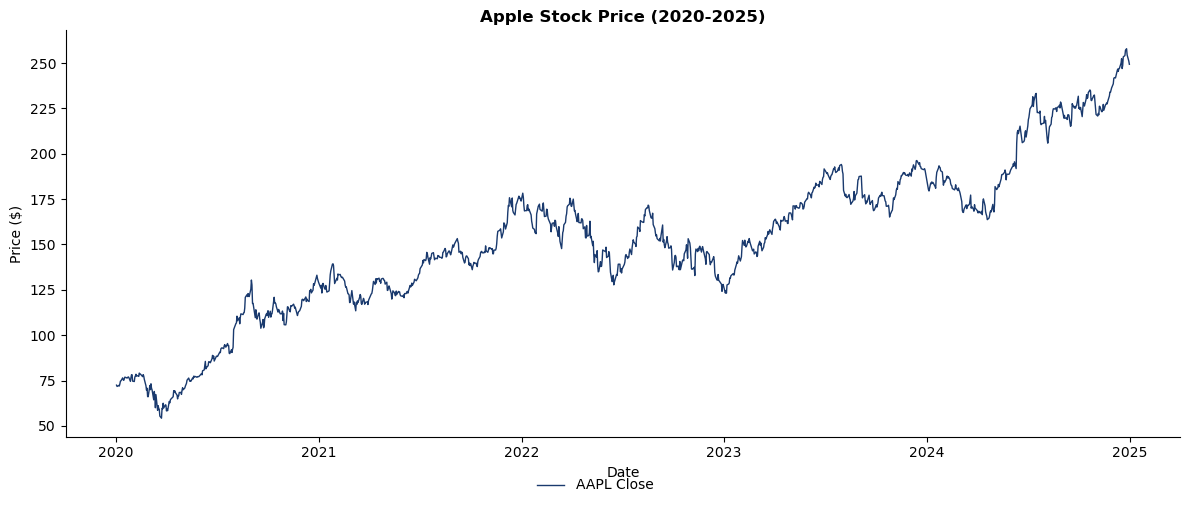

In [31]:
# SOLUTION
print("SOLUTION:")
print("="*50)

# Download data
data = yf.download('AAPL', start='2020-01-01', end='2025-01-01', progress=False)
# Flatten multi-level columns (newer yfinance returns MultiIndex)
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.droplevel(1)
print(f"Downloaded {len(data)} observations")

# Plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(data.index, data['Close'], color=BLUE, linewidth=1, label='AAPL Close')
ax.set_title('Apple Stock Price (2020-2025)', fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=1, bbox_to_anchor=(0.5, -0.02))
plt.subplots_adjust(bottom=0.15)
plt.tight_layout()
plt.show()

In [32]:
# Statistics
print(f"\nBasic Statistics:")
print(f"Mean: ${data['Close'].mean():.2f}")
print(f"Std Dev: ${data['Close'].std():.2f}")
print(f"Min: ${data['Close'].min():.2f}")
print(f"Max: ${data['Close'].max():.2f}")


Basic Statistics:
Mean: $151.66
Std Dev: $41.93
Min: $54.26
Max: $257.85


## Exercise 5: Decomposition

In [33]:
# TASK: Perform STL decomposition on airline passengers data

# Load data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
airline = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
airline.columns = ['Passengers']

# Step 1: Apply STL decomposition with period=12
# YOUR CODE HERE
# stl = STL(...)  # <-- Complete this
# result = stl.fit()


# Step 2: Plot all four components (original, trend, seasonal, residual)
# YOUR CODE HERE


# Step 3: Calculate what percentage of variance is explained by trend
# Hint: Compare Var(trend) to Var(original)
# YOUR CODE HERE


SOLUTION:


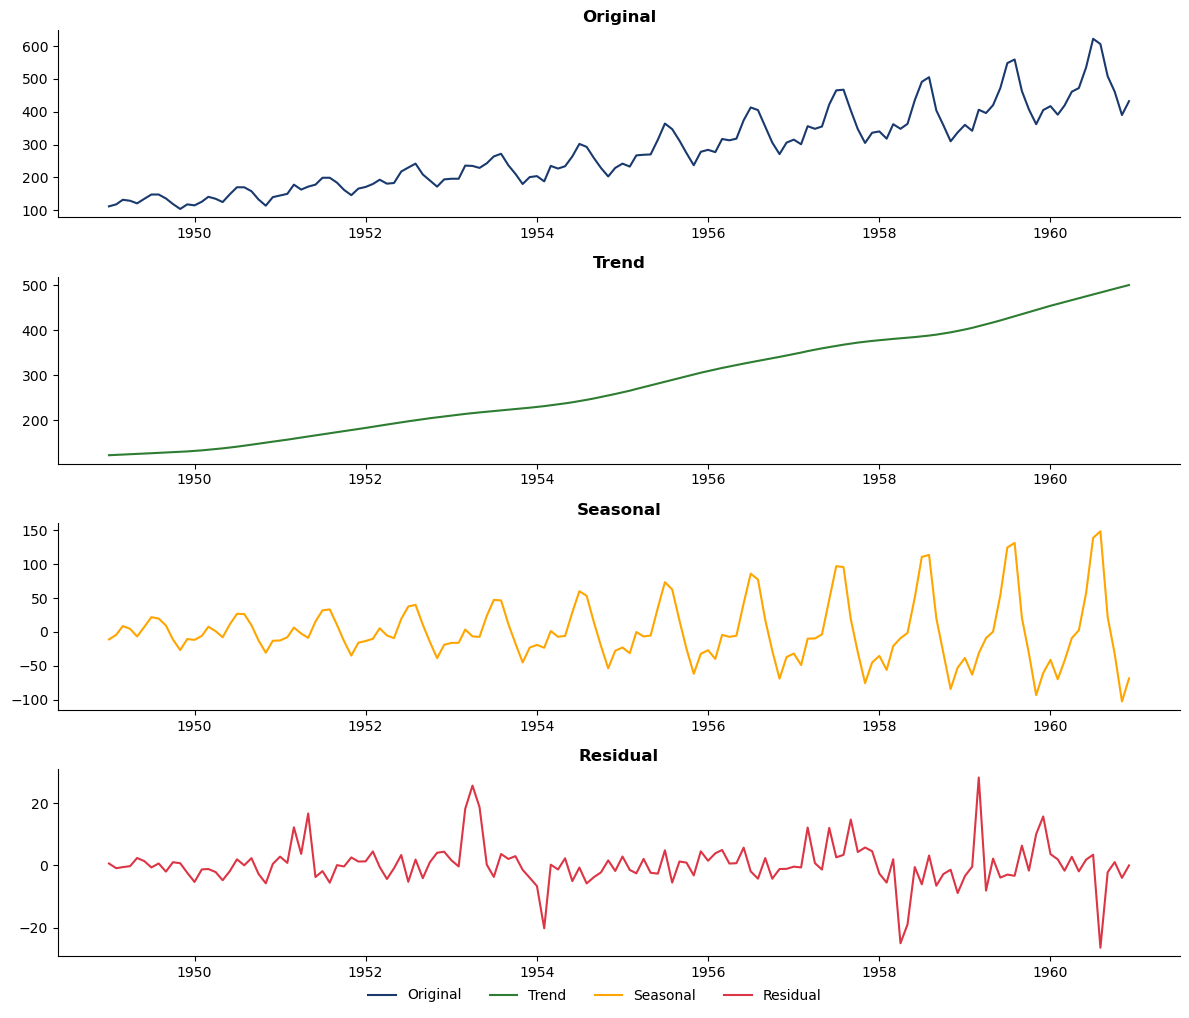

In [34]:
# SOLUTION
print("SOLUTION:")
print("="*50)

# STL decomposition
stl = STL(airline['Passengers'], period=12, robust=True)
result = stl.fit()

# Plot
fig, axes = plt.subplots(4, 1, figsize=(12, 10))

axes[0].plot(airline.index, airline['Passengers'], color=BLUE, label='Original')
axes[0].set_title('Original', fontweight='bold')

axes[1].plot(airline.index, result.trend, color=GREEN, label='Trend')
axes[1].set_title('Trend', fontweight='bold')

axes[2].plot(airline.index, result.seasonal, color='orange', label='Seasonal')
axes[2].set_title('Seasonal', fontweight='bold')

axes[3].plot(airline.index, result.resid, color=RED, label='Residual')
axes[3].set_title('Residual', fontweight='bold')

# Collect handles and labels from all axes
handles, labels = [], []
for ax in axes:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.02))
plt.subplots_adjust(bottom=0.08)
plt.tight_layout()
plt.show()

In [35]:
# Variance explained
var_original = airline['Passengers'].var()
var_trend = result.trend.var()
pct_explained = (var_trend / var_original) * 100

print(f"\nVariance of original: {var_original:.2f}")
print(f"Variance of trend: {var_trend:.2f}")
print(f"Percentage explained by trend: {pct_explained:.1f}%")


Variance of original: 14391.92
Variance of trend: 12526.75
Percentage explained by trend: 87.0%


## Exercise 6: Stationarity Testing

In [36]:
# TASK: Test for stationarity using ADF and KPSS tests

# Use the Apple stock data from Exercise 4
prices = data['Close'].dropna()
returns = prices.pct_change().dropna() * 100

# Step 1: Run ADF test on prices
# adf_prices = adfuller(...)  # <-- Complete this
# Print the test statistic and p-value


# Step 2: Run ADF test on returns
# YOUR CODE HERE


# Step 3: Run KPSS test on both
# kpss_prices = kpss(...)  # <-- Complete this


# Step 4: Interpret the results
# Are prices stationary? Are returns stationary?

In [37]:
# SOLUTION
print("SOLUTION:")
print("="*50)

# Test prices
print("\n--- PRICES ---")
adf_prices = adfuller(prices, autolag='AIC')
print(f"ADF Test:")
print(f"  Statistic: {adf_prices[0]:.4f}")
print(f"  p-value: {adf_prices[1]:.4f}")
print(f"  Conclusion: {'STATIONARY' if adf_prices[1] < 0.05 else 'NON-STATIONARY'}")

kpss_prices = kpss(prices, regression='c', nlags='auto')
print(f"\nKPSS Test:")
print(f"  Statistic: {kpss_prices[0]:.4f}")
print(f"  p-value: {kpss_prices[1]:.4f}")
print(f"  Conclusion: {'NON-STATIONARY' if kpss_prices[1] < 0.05 else 'STATIONARY'}")

# Test returns
print("\n--- RETURNS ---")
adf_returns = adfuller(returns, autolag='AIC')
print(f"ADF Test:")
print(f"  Statistic: {adf_returns[0]:.4f}")
print(f"  p-value: {adf_returns[1]:.4f}")
print(f"  Conclusion: {'STATIONARY' if adf_returns[1] < 0.05 else 'NON-STATIONARY'}")

kpss_returns = kpss(returns, regression='c', nlags='auto')
print(f"\nKPSS Test:")
print(f"  Statistic: {kpss_returns[0]:.4f}")
print(f"  p-value: {kpss_returns[1]:.4f}")
print(f"  Conclusion: {'NON-STATIONARY' if kpss_returns[1] < 0.05 else 'STATIONARY'}")

print("\n" + "="*50)
print("INTERPRETATION:")
print("- Prices are NON-STATIONARY (both tests agree)")
print("- Returns are STATIONARY (both tests agree)")
print("- This is why we model RETURNS, not prices!")

SOLUTION:

--- PRICES ---
ADF Test:
  Statistic: -0.7084
  p-value: 0.8446
  Conclusion: NON-STATIONARY

KPSS Test:
  Statistic: 4.9644
  p-value: 0.0100
  Conclusion: NON-STATIONARY

--- RETURNS ---
ADF Test:
  Statistic: -11.3529
  p-value: 0.0000
  Conclusion: STATIONARY

KPSS Test:
  Statistic: 0.1092
  p-value: 0.1000
  Conclusion: STATIONARY

INTERPRETATION:
- Prices are NON-STATIONARY (both tests agree)
- Returns are STATIONARY (both tests agree)
- This is why we model RETURNS, not prices!


/var/folders/pk/sxdc5n5x6mb322grbvxz_nm40000gp/T/ipykernel_13276/3419732144.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_prices = kpss(prices, regression='c', nlags='auto')
/var/folders/pk/sxdc5n5x6mb322grbvxz_nm40000gp/T/ipykernel_13276/3419732144.py:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_returns = kpss(returns, regression='c', nlags='auto')


## Exercise 7: Forecast Comparison

In [38]:
# TASK: Compare SES, Holt, and Holt-Winters on airline data

# Split data
train = airline[:'1958']
test = airline['1959':]

# Step 1: Fit Simple Exponential Smoothing
# ses = SimpleExpSmoothing(train['Passengers']).fit()
# ses_forecast = ses.forecast(len(test))


# Step 2: Fit Holt's method (trend='add')
# YOUR CODE HERE


# Step 3: Fit Holt-Winters with multiplicative seasonality
# YOUR CODE HERE


# Step 4: Calculate RMSE for each method
# YOUR CODE HERE


# Step 5: Plot all forecasts vs actual
# YOUR CODE HERE


/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


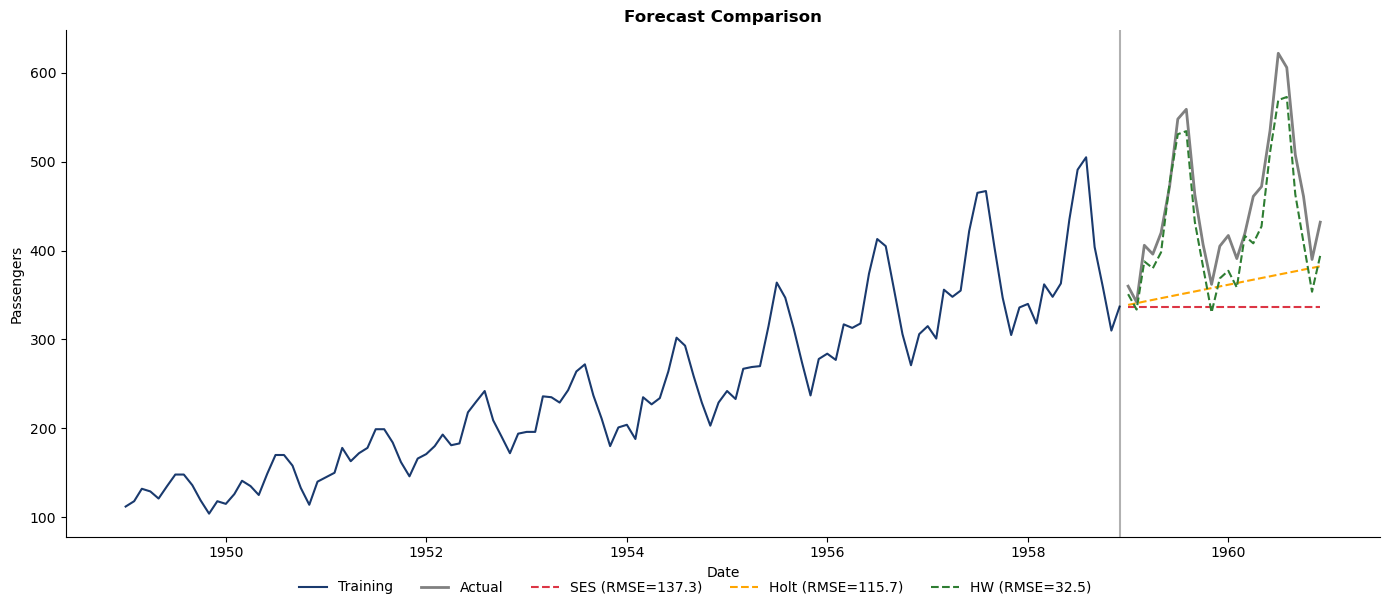

In [39]:
# SOLUTION

# Fit models
ses = SimpleExpSmoothing(train['Passengers']).fit()
holt = ExponentialSmoothing(train['Passengers'], trend='add', seasonal=None).fit()
hw = ExponentialSmoothing(train['Passengers'], trend='add', 
                          seasonal='mul', seasonal_periods=12).fit()

# Forecasts
h = len(test)
ses_fc = ses.forecast(h)
holt_fc = holt.forecast(h)
hw_fc = hw.forecast(h)

# Calculate RMSE
actual = test['Passengers'].values
rmse_ses = np.sqrt(mean_squared_error(actual, ses_fc))
rmse_holt = np.sqrt(mean_squared_error(actual, holt_fc))
rmse_hw = np.sqrt(mean_squared_error(actual, hw_fc))

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(train.index, train['Passengers'], color=BLUE, label='Training')
ax.plot(test.index, test['Passengers'], color='gray', linewidth=2, label='Actual')
ax.plot(test.index, ses_fc, color=RED, linestyle='--', label=f'SES (RMSE={rmse_ses:.1f})')
ax.plot(test.index, holt_fc, color='orange', linestyle='--', label=f'Holt (RMSE={rmse_holt:.1f})')
ax.plot(test.index, hw_fc, color=GREEN, linestyle='--', label=f'HW (RMSE={rmse_hw:.1f})')
ax.axvline(x=train.index[-1], color='black', linestyle='-', alpha=0.3)
ax.set_title('Forecast Comparison', fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.02))
plt.subplots_adjust(bottom=0.15)
plt.tight_layout()
plt.show()

In [40]:
print("SOLUTION:")
print("="*50)
print(f"\nRMSE Comparison:")
print(f"  SES:          {rmse_ses:.2f}")
print(f"  Holt:         {rmse_holt:.2f}")
print(f"  Holt-Winters: {rmse_hw:.2f}")
print(f"\nBest Model: Holt-Winters (captures seasonality!)")

SOLUTION:

RMSE Comparison:
  SES:          137.33
  Holt:         115.70
  Holt-Winters: 32.49

Best Model: Holt-Winters (captures seasonality!)


---
# Part 5: Discussion Questions

Write your answers in the markdown cells below.

### Discussion 1

**Scenario:** You are analyzing monthly sales data for a retail company. The data shows clear seasonality (high sales in December) and an upward trend. The seasonal peaks have been getting larger over time.

**Questions:**
1. Should you use additive or multiplicative decomposition? Why?
2. Which exponential smoothing method would you recommend?
3. How would you evaluate your forecast model?

**Your Answer:**

*Write your answer here...*

### Discussion 2

**Scenario:** A colleague claims: "I ran the ADF test on my stock price data and got a p-value of 0.65, so my data is stationary and I can fit an ARMA model directly."

**Questions:**
1. What is wrong with this interpretation?
2. What do the ADF hypotheses actually test?
3. What should the colleague do before fitting an ARMA model?

**Your Answer:**

*Write your answer here...*

---
# Summary

## Key Takeaways from Today's Seminar

1. **Time series are dependent** - not i.i.d. like cross-sectional data
2. **Choose decomposition wisely** - multiplicative when seasonal amplitude grows
3. **Understand smoothing parameters** - high α = reactive, low α = smooth
4. **Test for stationarity** - use both ADF and KPSS together
5. **Proper evaluation** - never tune on test set!
6. **Random walk is non-stationary** - variance grows with time

## Next Seminar
ARMA/ARIMA model identification, estimation, and forecasting